<center>
    <h1>Data analysis in Python</h1>
    <br>
    <h2>Tim Mulder</h2>
    <br>
    <h3>Hyperthermia Unit, Radiation Oncology
        <br>
        Erasmus MC, Rotterdam</h3>
</center>

# Data analysis: statistics / machine learning with skikit-learn
= software looking for patterns
* Supervised vs unsupervised learning
* Classification, regression
* Autonomous software

## Support vector machines
* Can be used for classification (SVC), regression (SVR), outlier detection
* Fast, memory efficient prediction
* Linear thresholded error function makes it tolerant to outliers
* Versatile: can use different kernel functions
    * Kernel function is used to (non-linearly) map data to feature space, in which robust classification/regression is attempted

* Warning: not variable scale invariant (normalize your data)!

## Support vector classification (SVC)
* Linear SVC parameter: C, which controls the weight of each support vector, i.e. smoothness

In [1]:
import sklearn
from sklearn import svm
from random import gauss

data = [[gauss(3, 1.5), gauss(3,1.5)] for _ in range(100)]
data += [[gauss(6, 1.5), gauss(6, 1.5)] for _ in range(100)]

truth_values = [0] * 100 + [1] * 100

svc_lin_c1 = svm.SVC(kernel = "linear", C = 1)
svc_lin_c1.fit(data, truth_values)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Plot the data:


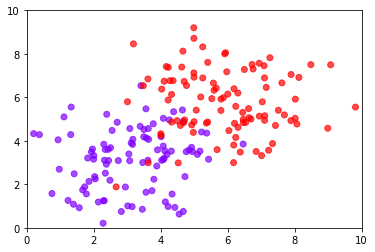

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm

svc_lin_c1_fig = plt.figure()
ax_svc_lin_c1_fig = svc_lin_c1_fig.add_subplot(111)
ax_svc_lin_c1_fig.set_xlim(0, 10)
ax_svc_lin_c1_fig.set_ylim(0, 10)

ax_svc_lin_c1_fig.scatter([x[0] for x in data], [y[1] for y in data], c = truth_values, cmap = matplotlib.cm.rainbow, alpha = 0.7)

In [3]:
svc_lin_c1.predict([[3, 3]])

array([0])

In [4]:
svc_lin_c1.predict([[6, 6]])

array([1])

In [5]:
svc_lin_c1.predict([[4, 4]])

array([0])

In [6]:
svc_lin_c1.predict([[5, 5]])

array([1])

Exercise: plot all correctly classified values green and all incorrectly classified values red

* Plot the class boundary using a meshgrid:

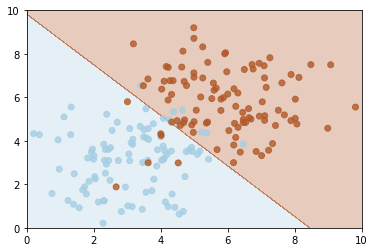

In [7]:
import numpy as np

svc_lin_c1_fig_2 = plt.figure()
ax_svc_lin_c1_fig_2 = svc_lin_c1_fig_2.add_subplot(111)
ax_svc_lin_c1_fig_2.set_xlim(0, 10)
ax_svc_lin_c1_fig_2.set_ylim(0, 10)

# Use the meshgrid command yourself to see what it does
xx, yy = np.meshgrid(np.linspace(0, 10, 1000), np.linspace(0, 10, 1000))

svc_lin_c1_predictions = svc_lin_c1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

ax_svc_lin_c1_fig_2.contourf(xx, yy, svc_lin_c1_predictions, cmap = matplotlib.cm.Paired, alpha = 0.3)

ax_svc_lin_c1_fig_2.scatter([x[0] for x in data], [y[1] for y in data], c = truth_values, cmap = matplotlib.cm.Paired, alpha = 0.8)

* There are also non-linear kernels available

* See video

Add another cluster to the data

In [8]:
data += [[gauss(4, 2), gauss(2, 0.5)] for _ in range(50)]
truth_values += [2] * 50

## Train and test sets
* Models are trained on data for prediction
    * Data is split into a train set and a test set 
    * To assess the generalisation (i.e. prediction based on unseen data) of models more robustly, especially when data is scarce: K-fold validation

* Extreme case: Leave One Out (LOO), in which K = n

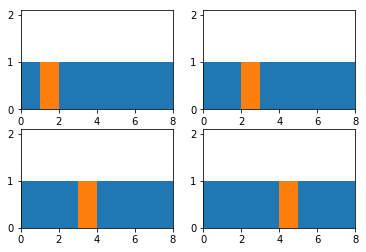

In [9]:
#Figure to elaborate on LOO
loo_fig = plt.figure()

for i in range(1, 5):
    loo_fig_ax = loo_fig.add_subplot(2, 2, i)
    loo_fig_ax.set_xlim(0, 8)
    loo_fig_ax.hist([x for x in range(0, 11, 1) if x != i], width = 1)
    loo_fig_ax.hist([i], width = 1)

etc...

## Grid search
* Sometimes algorithms require meta-parameters (such as C in SVC)

* This search space can be sampled
    * exhaustively

*    * Randomly: see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html">the docs</a>

* Of course we want to combine meta-parameter grid search with cross validation

* Don't take a too high cross validation value during grid search, as it is computationally very expensive

* The package sklearn-deap provides an evolutionary algorithm solution to meta-parameter fitting

In [10]:
parameter_grid = [
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3], 'gamma': ['scale']},
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale'], 'kernel': ['rbf']},
 ]

grid_search_svc = sklearn.model_selection.GridSearchCV(svm.SVC(), parameter_grid, cv = 3, iid = False)

In [11]:
grid_search_svc.fit(data, truth_values)

grid_search_svc.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

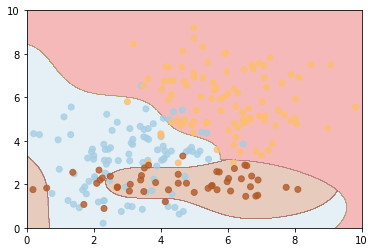

In [12]:
import numpy as np

svc_best_fig = plt.figure()
ax_svc_best_fig = svc_best_fig.add_subplot(111)
ax_svc_best_fig.set_xlim(0, 10)
ax_svc_best_fig.set_ylim(0, 10)

xx, yy = np.meshgrid(np.linspace(0, 10, 1000), np.linspace(0, 10, 1000))

svc_best_predictions = grid_search_svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

ax_svc_best_fig.contourf(xx, yy, svc_best_predictions, cmap = matplotlib.cm.Paired, alpha = 0.3)

ax_svc_best_fig.scatter([x[0] for x in data], [y[1] for y in data], c = truth_values, cmap = matplotlib.cm.Paired, alpha = 0.8)

# Exercises
* implement a support vector regression (SVR) machine to predict a numeric column of your own data based on numerical data columns

* write a notebook or script that graphically shows the performance of variations in meta-parameters, i.e. plot the search landscape

### Final exercise
* Use cross-validation and grid search to build a classifier/regressor that predicts one of the parameters in your own data